<a href="https://colab.research.google.com/github/Paul-Ajibola/Data-Science-Projects/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## IMPORT THE NEEDED LIBRARIES
# Data Handling and Core Libraries
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Model Selection and Building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Model Evaluation and Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
# GOAL: To build and evaluate a ML model that predicts the presence or absence of heart disease in a patient based on a set of medical attributes

In [ ]:
# EXPLORATORY DATA ANALYSIS

# Import Data
df = pd.read_csv('/content/drive/MyDrive/Portfolio Dataset/Heart Disease Dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
#Renaming the columns for ease of identification
df.rename(columns={
    'cp': 'chest_pain',
    'trestbps': 'resting_blood_pressure',
    'chol': 'cholesterol',
    'fbs': 'fasting_blood_sugar',
    'restecg': 'resting_ecg',
    'thalach': 'max_heart_rate',
    'exang': 'exercise_induced_angina',
    'oldpeak': 'st_depression',
    'ca': 'num_major_vessels',
    'target': 'heart_disease'
}, inplace=True)

In [ ]:
df.head()

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,slope,num_major_vessels,thal,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1025 non-null   int64  
 1   sex                      1025 non-null   int64  
 2   chest_pain               1025 non-null   int64  
 3   resting_blood_pressure   1025 non-null   int64  
 4   cholesterol              1025 non-null   int64  
 5   fasting_blood_sugar      1025 non-null   int64  
 6   resting_ecg              1025 non-null   int64  
 7   max_heart_rate           1025 non-null   int64  
 8   exercise_induced_angina  1025 non-null   int64  
 9   st_depression            1025 non-null   float64
 10  slope                    1025 non-null   int64  
 11  num_major_vessels        1025 non-null   int64  
 12  thal                     1025 non-null   int64  
 13  heart_disease            1025 non-null   int64  
dtypes: float64(1), int64(13)

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
chest_pain,0
resting_blood_pressure,0
cholesterol,0
fasting_blood_sugar,0
resting_ecg,0
max_heart_rate,0
exercise_induced_angina,0
st_depression,0


In [ ]:
df.nunique()

,0
age,41
sex,2
chest_pain,4
resting_blood_pressure,49
cholesterol,152
fasting_blood_sugar,2
resting_ecg,3
max_heart_rate,91
exercise_induced_angina,2
st_depression,40


<Axes: xlabel='heart_disease'>

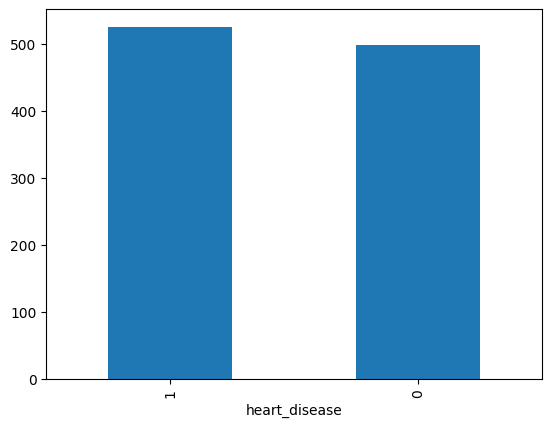

In [ ]:
df['heart_disease'].value_counts().plot(kind='bar')

***FOR THE CATEGORICAL COLUMNS***

<Axes: xlabel='chest_pain', ylabel='count'>

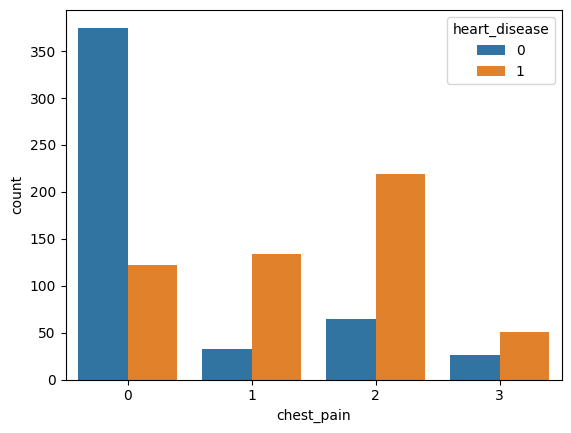

In [ ]:
sns.countplot(x='chest_pain', hue='heart_disease', data=df)

The visualization clearly shows that the **vast majority of patients with chest pain type 0 do not have heart diseases**. On the other hand, those with **Type 1, 2 and 3 chest pain do have heart diseases.** This is demonstrated by the fact the orange bar is taller than the blue bars in each case.

Conclusion: ***`Chest pain is a strong indicator of heart disease. `***

<Axes: xlabel='sex', ylabel='count'>

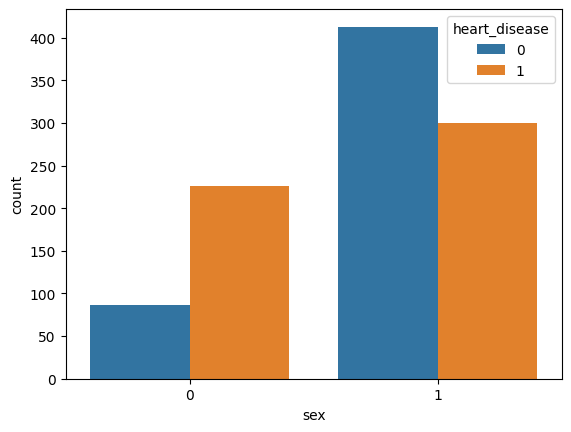

In [ ]:
sns.countplot(x='sex', hue='heart_disease', data=df)

The visualization shows that:
1. The data contains **significantly higher number of males** (labelled as ***1***), than females (labelled as ***0***).

2. The **females have a much higher rate of heart disease** than males.

<Axes: xlabel='fasting_blood_sugar', ylabel='count'>

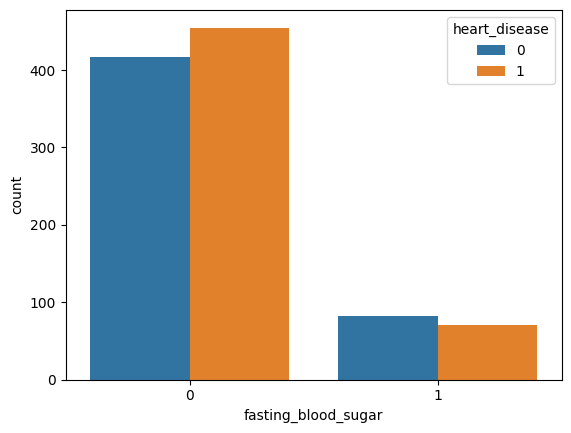

In [ ]:
sns.countplot(x='fasting_blood_sugar', hue='heart_disease', data=df)

***0*** = people with normal fasting blood sugar

***1*** = people with high fasting blodd sugar

The visualization shows that the **fasting blood sugar status does not have a significant effect** on where a patient will **have or not** have heart diseases. This is evidenced in the fact that both groups have **roughly equally split bars**, with no significant differences in heights.

<Axes: xlabel='resting_ecg', ylabel='count'>

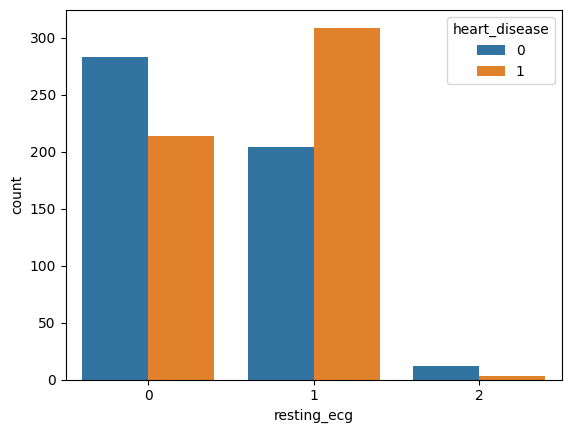

In [ ]:
sns.countplot(x='resting_ecg', hue='heart_disease', data=df)

***0*** = Normal resting ecg reading

***1*** = Abnormal (ST-T Wave) resting ecg reading

***2*** = Left Ventricular Hypertrophy resting ecg reading

The visualization shows that:
- With **group 0**, *more people do not have heart disease than those who do*.

- With **group 1**, *there are significantly higher number of people who have a heart disease than those who do not*.

- With **group 2**, *very few people were sampled making it hard to draw a strong conclusion*. However, more people seem to not have a heart disease.



<Axes: xlabel='exercise_induced_angina', ylabel='count'>

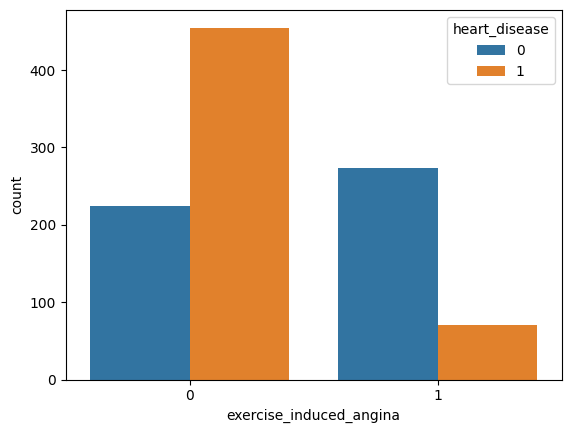

In [ ]:
sns.countplot(x='exercise_induced_angina', hue='heart_disease', data=df)

exercise_induced_angina = ***0*** (**NO**)

exercise_induced_angina = ***1*** (**YES**)

The visualization shows that:
- The vast majority of people with exercise_induced_angina (***1***) do not have a heart disease.

- The vast majority of people who do not have exercise_induced_angina (***0***) have a heart disease.

`It shows that this feature is a great predictor.`

<Axes: xlabel='slope', ylabel='count'>

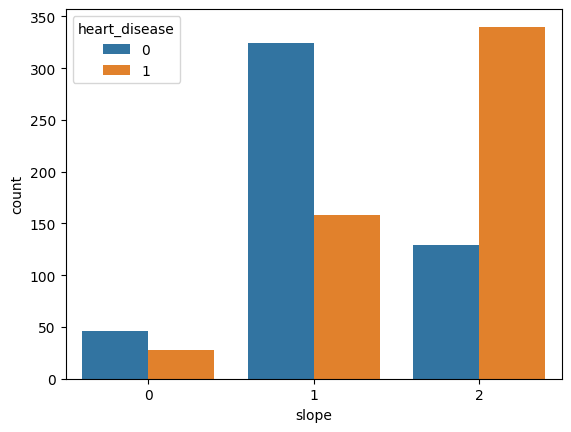

In [ ]:
sns.countplot(x='slope', hue='heart_disease', data=df)

***SLOPE:*** The slope of the peak exercise ST segment.

**slope 1**: a large majority of patients do not have heart disease.

**slope 2**: a large majority do have a heart disease

`Therefore, slope is also a great predictor. `

<Axes: xlabel='num_major_vessels', ylabel='count'>

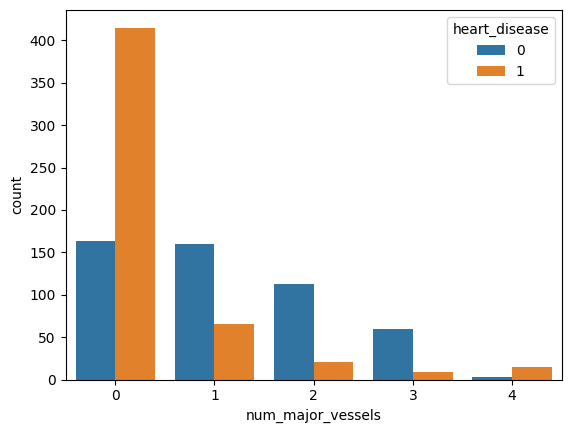

In [ ]:
sns.countplot(x='num_major_vessels', hue='heart_disease', data=df)

num_major_vessel = 0: They are **more likely to have heart disease.**

num_major_vessel = 1, 2, or 3: **They are more likely not to have heart disease.**

Visualization shows that num_major_vessels is an **extremely** `strong predictor of heart disease.`

<Axes: xlabel='thal', ylabel='count'>

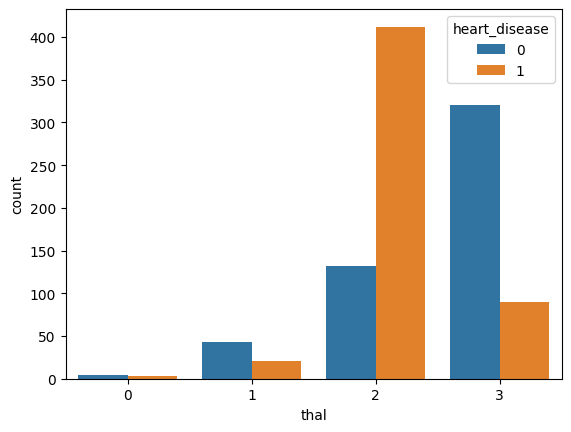

In [ ]:
sns.countplot(x='thal', hue='heart_disease', data=df)

`thal` (***thallium stress test***) result

For patient with **thal = 2**, the vast majority do have heart disease.

When **thal = 3**, the vast majority of the patient do not have heart diseases.

The visualization also shows that `thal is a very important feature that will be useful for our prediction. `

***FOR CONTINUOUS FEATURES***

<Axes: xlabel='heart_disease', ylabel='resting_blood_pressure'>

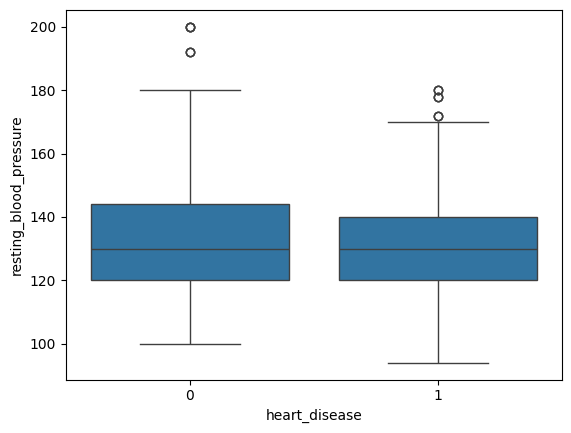

In [ ]:
sns.boxplot(y='resting_blood_pressure', x='heart_disease', data=df)

<Axes: xlabel='heart_disease', ylabel='cholesterol'>

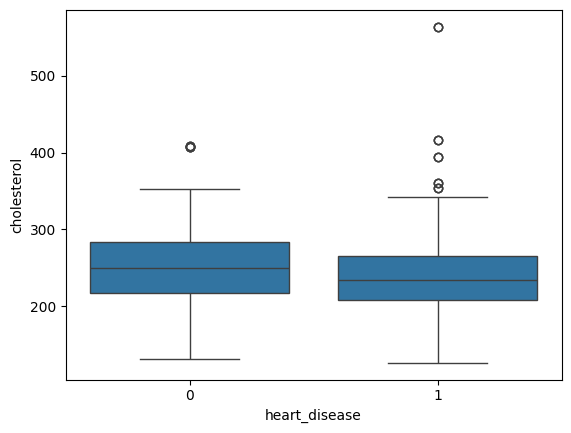

In [ ]:
sns.boxplot(y='cholesterol', x ='heart_disease', data=df)

The boxplot shows that **cholesterol levels are not a strong, simple predictor of heart disease** itself.

From the boxplot, cholesterol distributions for the healthy **(0)** and sick **(1)** patients are very similar. The median lines are very close and the middle 50% cover a very similar range of cholesterol values.

<Axes: xlabel='heart_disease', ylabel='max_heart_rate'>

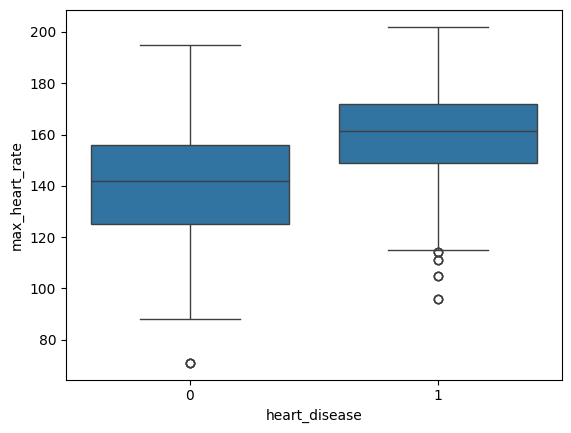

In [ ]:
sns.boxplot(y='max_heart_rate', x ='heart_disease', data=df)

The plots show *a strong relationship between max_heaert_rate and the presence of heart disease.*

In Group 0, **the patients tend to have a lower maximum heart rate**. The medium is comparatively lower to those in Group 1.

In Group 1, **the patients tend to have a slignificantly higher maximum heart rate**.

**Conclusion:** `Higher max_heart_rate is a strong indicator of heart disease in this dataset. `

<Axes: xlabel='heart_disease', ylabel='st_depression'>

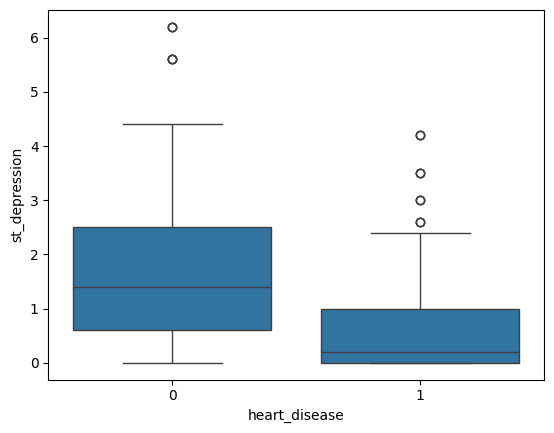

In [ ]:
sns.boxplot(y='st_depression', x ='heart_disease', data=df)

A high st_depression value is a **much stronger sign that a patient does not have heart disease** (they are more likely to be in Group 0).

***CORRELATION*** ***ANALYSIS***

In [ ]:
corr_matrix = df.corr()

corr_matrix

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,slope,num_major_vessels,thal,heart_disease
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
chest_pain,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
resting_blood_pressure,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
cholesterol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fasting_blood_sugar,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
resting_ecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
max_heart_rate,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exercise_induced_angina,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
st_depression,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<Axes: >

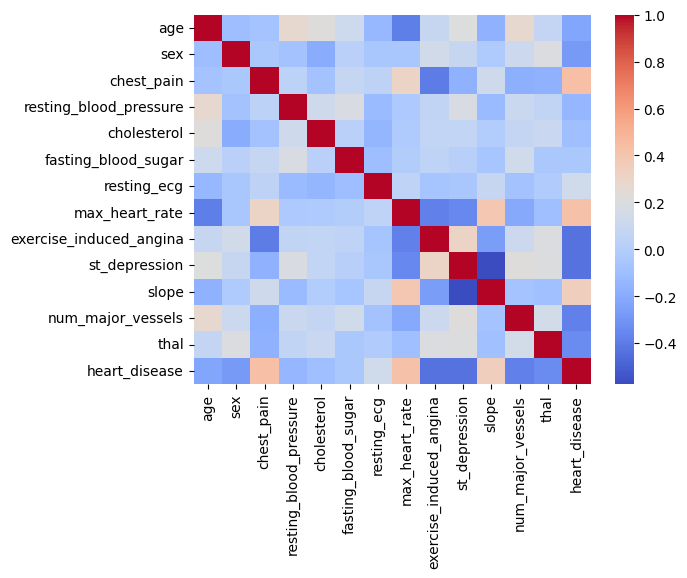

In [ ]:
sns.heatmap(corr_matrix, cmap='coolwarm')

# sns.heatmap(corr_matrix, , annot=True, cmap=True) This annotates the map with the value for each

***SPLITTING THE DATA***

In [ ]:
# Vertical Split
X = df.drop('heart_disease', axis=1)
y = df['heart_disease']

In [ ]:
# Horizontal Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Identify which columns need which transformation
categorical_features = ['sex', 'chest_pain', 'fasting_blood_sugar', 'resting_ecg', 'exercise_induced_angina', 'slope', 'num_major_vessels', 'thal']
continuous_features = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate', 'st_depression']

***PREPROCESSING***

In [ ]:
# Standardizing the Continuous Features for the Model
continuous_transformer = Pipeline(steps=[
('scaler', StandardScaler())
])

In [ ]:
# One-Hot Encoding the Categorical Features for the Model
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', continuous_transformer, continuous_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [ ]:
# log_reg_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', LogisticRegression(random_state=42))
# ])

X_train_preprocessed = preprocessor.fit_transform(X_train)

In [ ]:
X_test_preprocessed = preprocessor.transform(X_test)

***Using the Logistic Regression Model***

In [ ]:
# Instantiate Logistic Regression Model
log_reg_model = LogisticRegression(random_state=42)

In [ ]:
# Fit Model on Preprocessed Data
log_reg_model.fit(X_train_preprocessed, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Make Prediction
y_pred = log_reg_model.predict(X_test_preprocessed)

***Logistic Regression Model Evaluation***

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.75      0.80       102
           1       0.78      0.89      0.83       103

    accuracy                           0.82       205
   macro avg       0.83      0.82      0.82       205
weighted avg       0.83      0.82      0.82       205



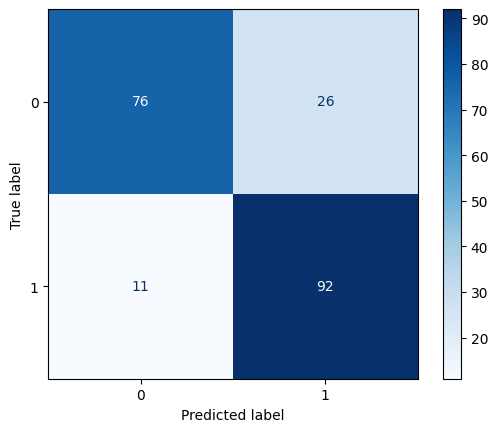

In [ ]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.show()

***Using the Random Forest Model***

In [ ]:
# Instantiate Random Forest Model
rf_model = RandomForestClassifier(random_state=42)

In [ ]:
# Fit the Model
rf_model.fit(X_train_preprocessed, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make Prediction
y_pred_rf = rf_model.predict(X_test_preprocessed)

***Random Forest Model Evaluation***

In [ ]:
#Classification Report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



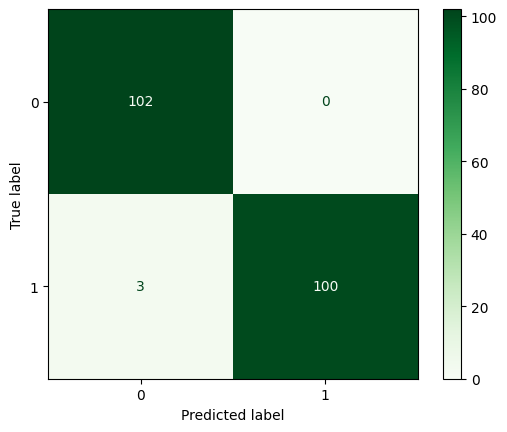

In [ ]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap='Greens')
plt.show()

***Using the XGBoost Model***

In [ ]:
# Instantiate XGB Model
xgb_model = XGBClassifier(random_state=42)

In [ ]:
# Fit the Model
xgb_model.fit(X_train_preprocessed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# Make Prediction
y_pred_xgb = xgb_model.predict(X_test_preprocessed)

***XGBoost Model Evaluation***

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



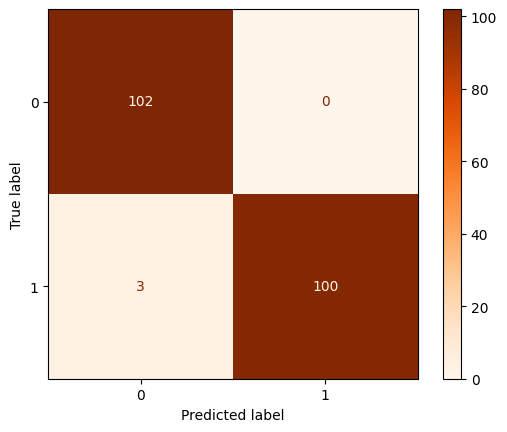

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, cmap='Oranges')
plt.show()

***SHOW THE ROC/AUC CURVE***


In [ ]:
# Prediction Probability for Logistic Regression Model
probs_log_reg = log_reg_model.predict_proba(X_test_preprocessed)[:,1]

# Prediction Probability for Random Forest Model
probs_rf = rf_model.predict_proba(X_test_preprocessed)[:,1]

# Prediction Probability for XGBoost Model
probs_xgb = xgb_model.predict_proba(X_test_preprocessed)[:,1]

In [ ]:
# Calculate the ROC Curve data and AUC Scores for Logistic Regression
fal_pos_rate_log_reg, true_pos_rate_log_reg, _ = roc_curve(y_test, probs_log_reg)
auc_log_reg = roc_auc_score(y_test, probs_log_reg)

In [ ]:
# Calculate the ROC Curve data and AUC Scores for the Random Forest
fal_pos_rate_rf, true_pos_rate_rf, _ = roc_curve(y_test, probs_rf)
auc_rf = roc_auc_score(y_test, probs_rf)

In [ ]:
# Calculate the ROC Curve data and AUC Scores for the XGBoost
fal_pos_rate_xgb, true_pos_rate_xgb, _ = roc_curve(y_test, probs_xgb)
auc_xgb = roc_auc_score(y_test, probs_xgb)

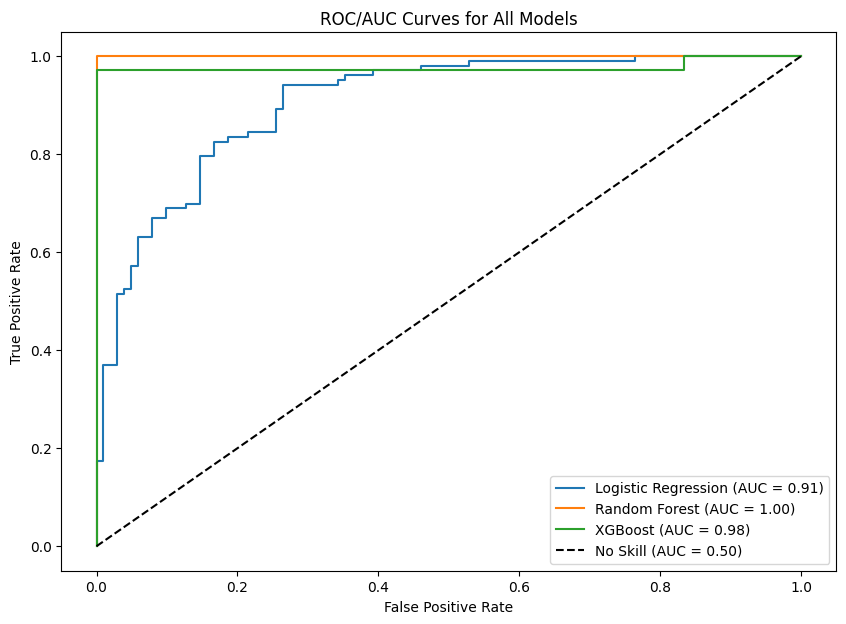

In [ ]:
# Plot the ROC Curves
plt.figure(figsize=(10, 7))

# Curve for Logistic Regression
plt.plot(fal_pos_rate_log_reg, true_pos_rate_log_reg, label=f'Logistic Regression (AUC = {auc_log_reg:.2f})')

# Curve for Random Forest
plt.plot(fal_pos_rate_rf, true_pos_rate_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')

# Curve for XGBoost
plt.plot(fal_pos_rate_xgb, true_pos_rate_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')

# Plot XGBoost
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='No Skill (AUC = 0.50)')

# Customize the Plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC/AUC Curves for All Models')
plt.legend()
plt.show()


***Feature Importances***

In [ ]:
importances = rf_model.feature_importances_

In [ ]:
all_feature_names = preprocessor.get_feature_names_out()

In [ ]:
feature_importances = pd.Series(importances, index=all_feature_names)

feature_importances.sort_values(ascending=True, inplace=True)

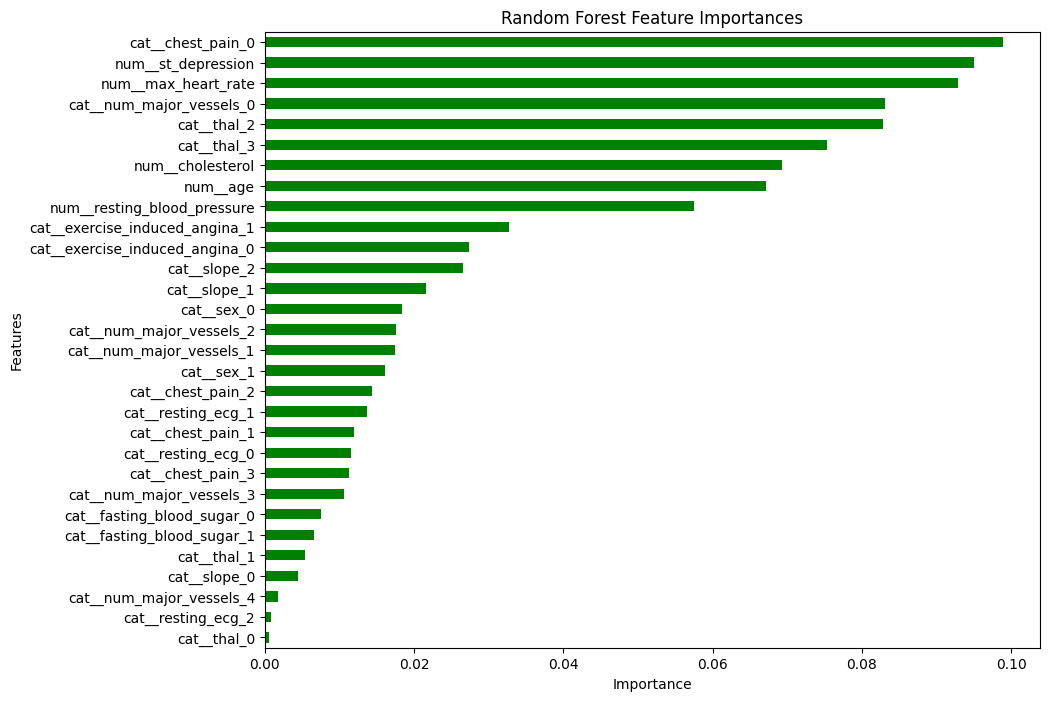

In [ ]:
plt.figure(figsize=(10, 8))
feature_importances.plot(kind='barh', color='green')

plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

The analysis reveals that the three strongest predictors of heart diseases are ***chest_pain_0, st_depression*** and ***max_heart_rate***.

On the other hand, features that relate to ***fasting_blood_sugar*** and ***thal*** were among the least significant predictors in the model.